<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Carlos Arturo Torres Sánchez y Luis Franciso Lopez Arnaud.

**Fecha:** 14 de marzo del 2025.

**Expediente** : 743067.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/MPST-2025-I/tarea-4-ejercicio-cnn-tarea4-6

# Tarea 4: Clase 14


# <font color= red>  Tarea  </font>

Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:

https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

### Ejercicio 1: (enunciado) Transcribirlo

Código de solución estudiante 1

## Housing dataset

Leemos el dataframe

In [1]:
# Código de solución estudiante 
import pandas as pd
from pywin.mfc.dialog import PrintDialog

file_path = 'Datasets/housing.csv'
df = pd.read_csv(file_path)

In [2]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Observamos lo que contiene el dataframe

In [3]:
df.shape

(545, 13)

In [4]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")
    print(df[col].unique())

price: int64
[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4907000  

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Haremos un pequeño y breve EDA

Text(0.5, 1.0, 'Distribución de Precios')

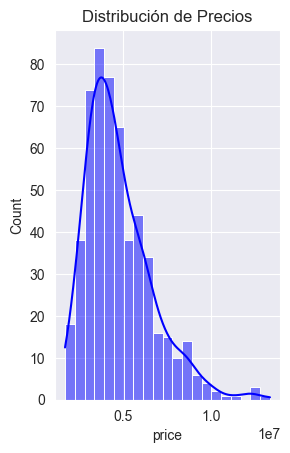

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Distribución de Precios')

Text(0.5, 1.0, 'Distribución del Área')

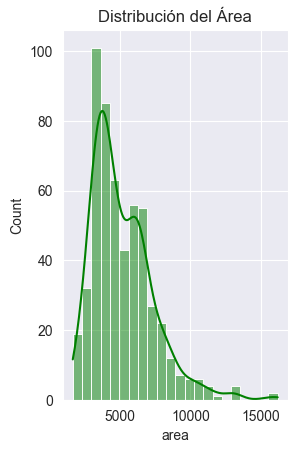

In [8]:
plt.subplot(1, 2, 2)
sns.histplot(df['area'], kde=True, color='green')
plt.title('Distribución del Área')

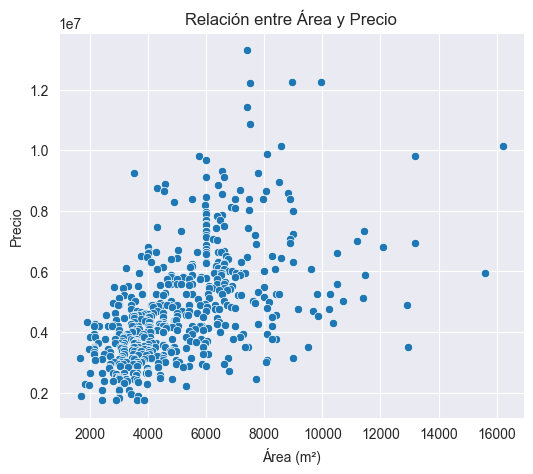

In [9]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Relación entre Área y Precio')
plt.xlabel('Área (m²)')
plt.ylabel('Precio')
plt.show()

In [10]:
object_cols = df.select_dtypes(include='object').columns

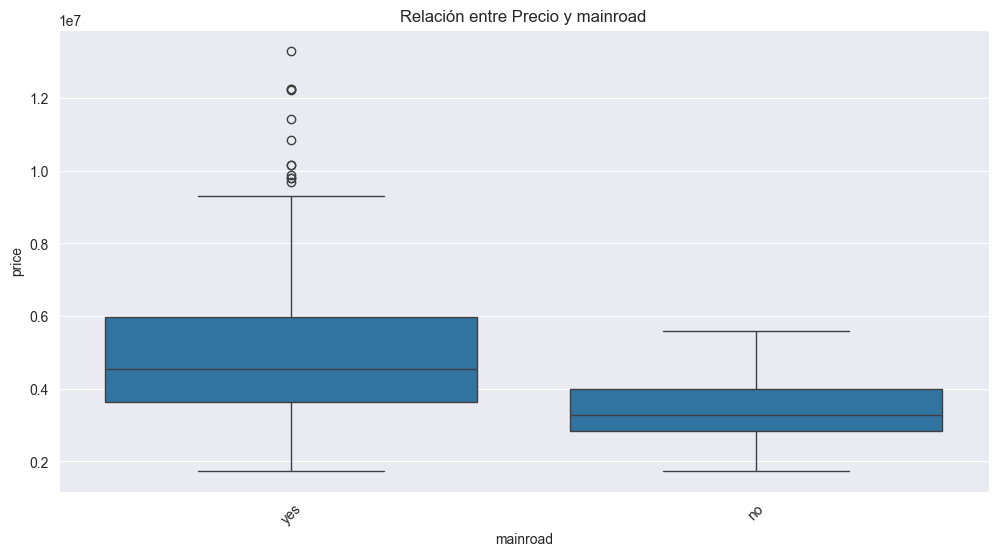

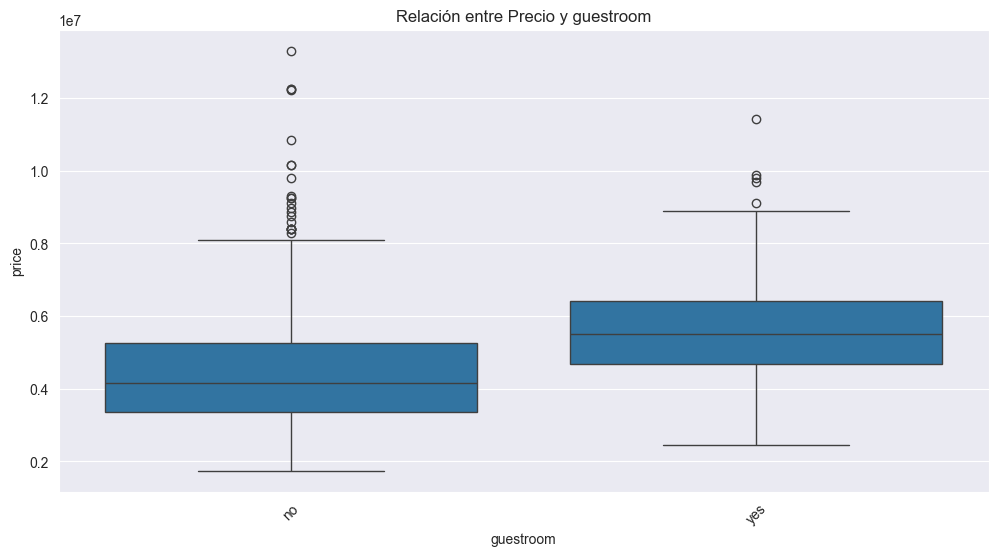

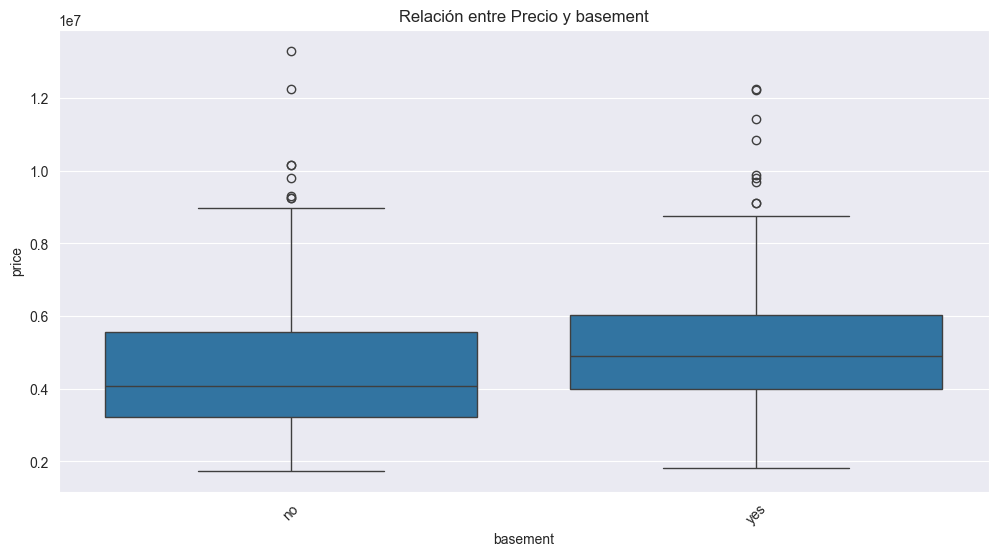

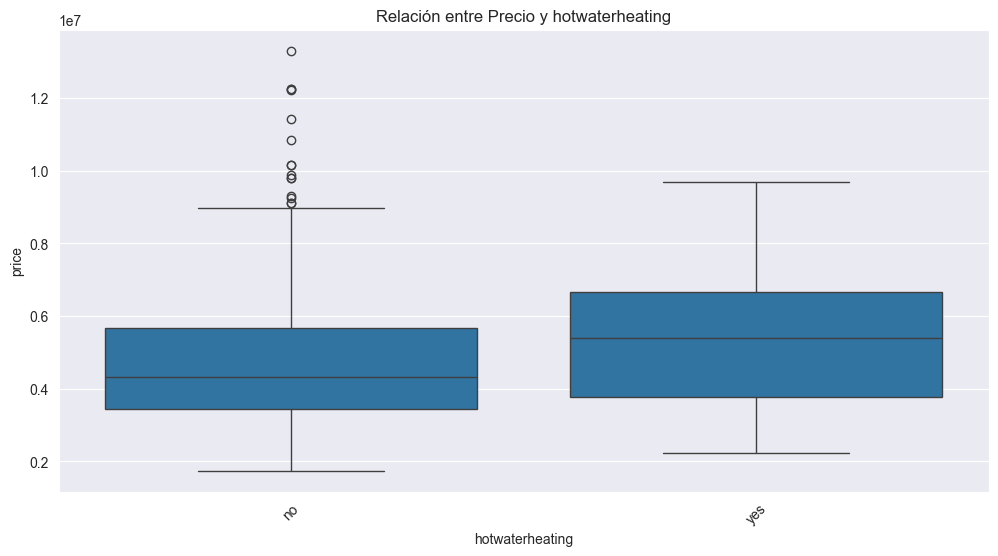

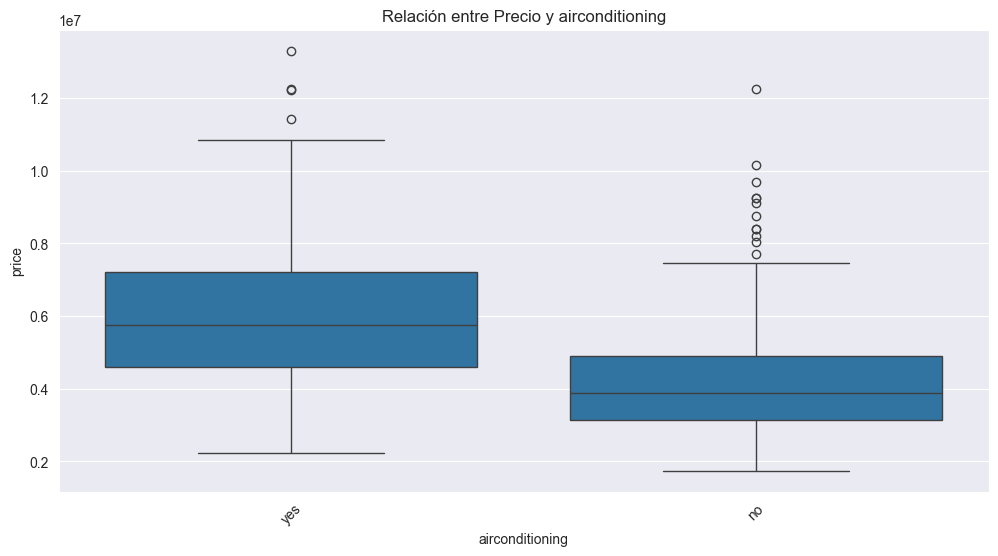

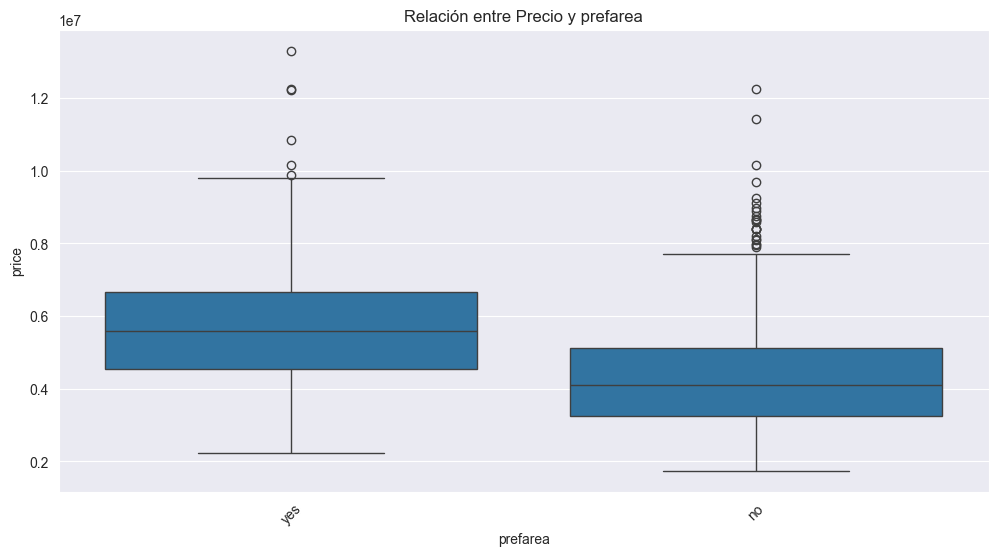

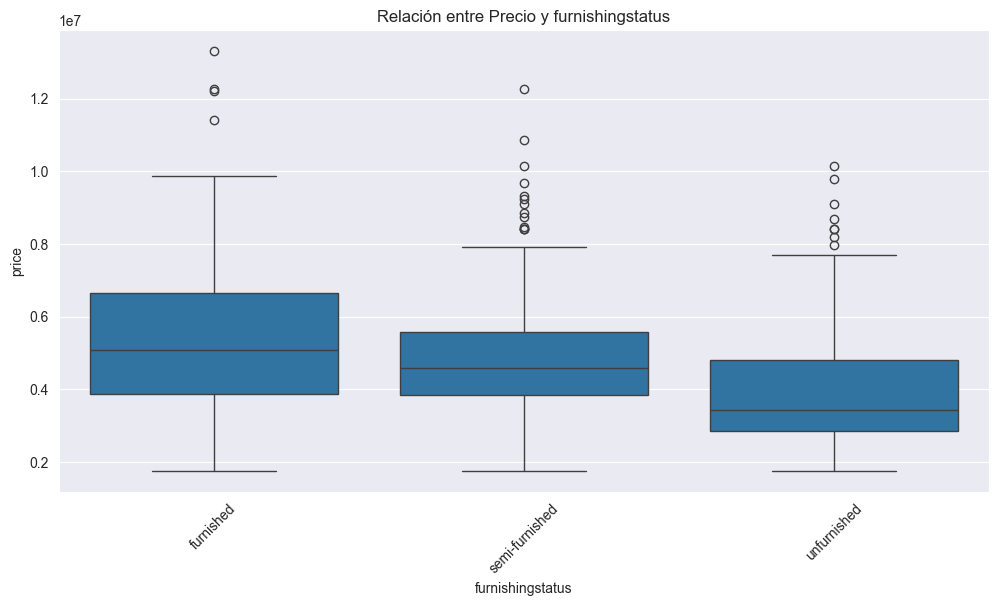

In [11]:
for col in object_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Relación entre Precio y {col}')
    plt.xticks(rotation=45)
    plt.show()


Podemos como las variables de tipo objeto cuando dice yes la media del precio es más alta y en el último caso cuando es furnished es mas alto el precio, por lo cuál podriamos hacer un ordinal encoding para tener más variables con valor de predicicón

Hacemos el encoding de las variables categoricas

In [12]:
binary_mapping = {"yes": 1, "no": 0}
binary_columns = ["mainroad","guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
for col in binary_columns:
    df[col] = df[col].map(binary_mapping)
    
furnishing_mapping = {"unfurnished": 0, "semi-furnished": 1, "furnished": 2}
df["furnishingstatus"] = df["furnishingstatus"].map(furnishing_mapping)

In [13]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


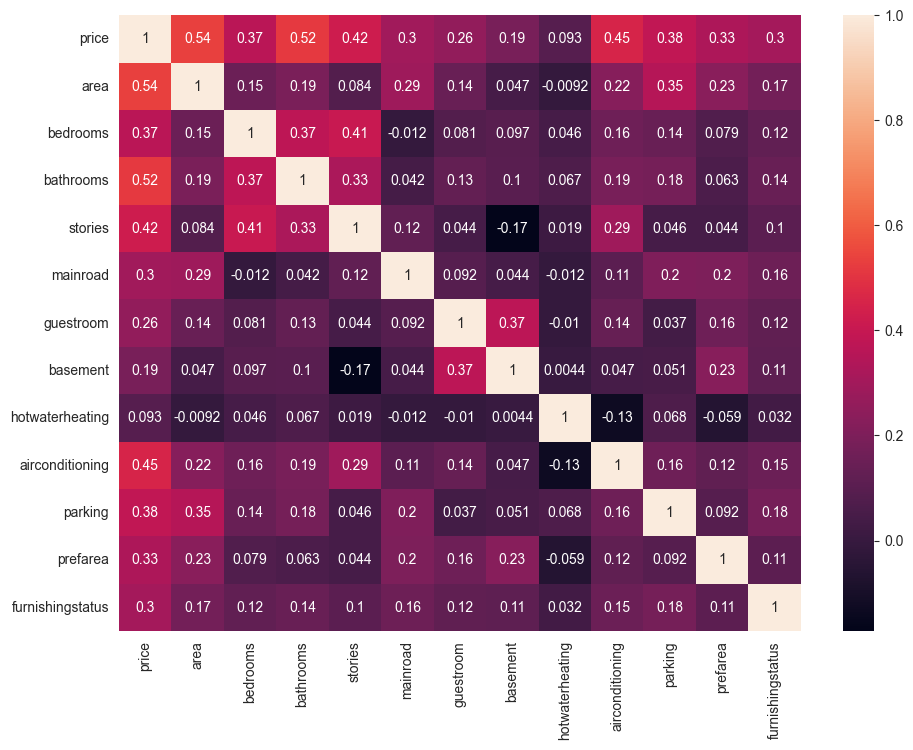

In [14]:
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, annot=True)
plt.show()

Ahora si con las variables encodeadas podemos pasar a la fase de modelado de datos

In [15]:
X = df[df.columns.drop("price")].values
y = df["price"].values

Importamos librerias y preparamos los datos para el modelado

In [16]:
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv1D, MaxPooling1D, Flatten, Dense, Dropout, 
                                     BatchNormalization, Input)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
X_train_scaled = X_scaler.fit_transform(X_train)  
X_test_scaled = X_scaler.transform(X_test)  


y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [19]:
print(f"y_train original: min={y_train.min()}, max={y_train.max()}")
print(f"y_train_scaled: min={y_train_scaled.min()}, max={y_train_scaled.max()}")


y_train original: min=1750000, max=12250000
y_train_scaled: min=0.0, max=1.0


Creamos la función para preparar los datos en el formato necesario para CNN

Para CNN, convertimos cada muestra en una “secuencia” de longitud igual a n_features con 1 canal

In [20]:
n_features = X_train.shape[1]
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], n_features, 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], n_features, 1))

Definimos el modelo que usaremos

In [21]:
model = Sequential([
    Input(shape=(n_features, 1)),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(),
    Dropout(0.3),

    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(),
    Dropout(0.3),

    Conv1D(filters=32, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(1)  # Capa de salida para regresión
])

# Compilar el modelo con un optimizador mejorado
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001), loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 12, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 6, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 2, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,817 (182.88 KB)

 Trainable params: 46,369 (181.13 KB)

 Non-trainable params: 448 (1.75 KB)

Entrenamos el modelo

In [22]:
history = model.fit(
        X_train_cnn, y_train_scaled,
        epochs=300,
        batch_size=32,
        validation_split=0.1,
        verbose=1
    )

Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.5725 - val_loss: 0.1180
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2988 - val_loss: 0.1403
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1788 - val_loss: 0.1150
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1830 - val_loss: 0.1169
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1405 - val_loss: 0.0893
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0852 - val_loss: 0.0876
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0939 - val_loss: 0.0823
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0912 - val_loss: 0.0615
Epoch 9/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0633 - val_loss: 0.0595
Epoch 10/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0637 - val_loss: 0.0535
Epoch 11/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0454 - val_loss: 0.0422
Epoch 12/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

Evaluamos el modelo

In [23]:
loss = model.evaluate(X_test_cnn, y_test_scaled, verbose=0)
print(f"Test MSE: {loss}")

Test MSE: 0.018426861613988876


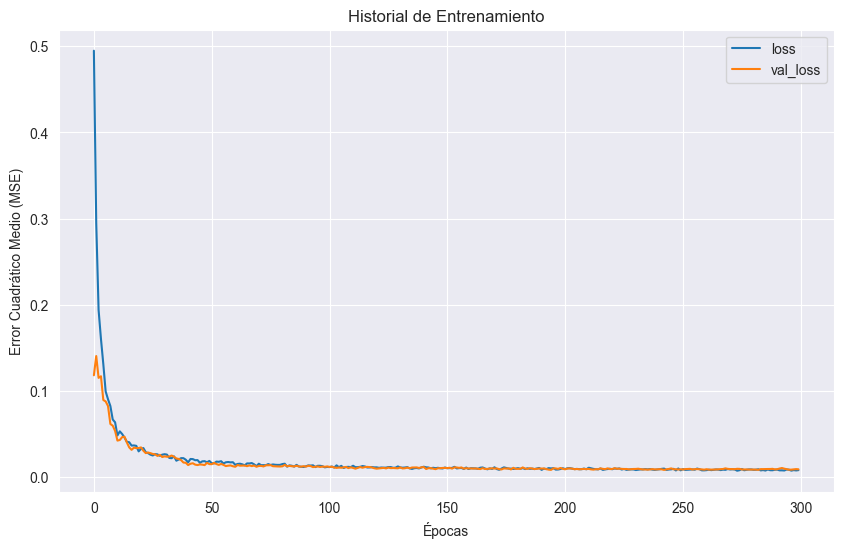

In [24]:
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.title('Historial de Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.show()

Hacemos predicciones

In [25]:
y_pred_scaled = model.predict(X_test_cnn)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test_actual = y_test.reshape(-1, 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [26]:
print(f"y_pred_scaled: min={y_pred_scaled.min()}, max={y_pred_scaled.max()}")
print(f"y_pred (convertido): min={y_pred.min()}, max={y_pred.max()}")
print(f"y_test_actual: min={y_test_actual.min()}, max={y_test_actual.max()}")

y_pred_scaled: min=0.11559732258319855, max=0.7893855571746826
y_pred (convertido): min=2963772.0, max=10038549.0
y_test_actual: min=1750000, max=13300000


Visualizamos las predicciones

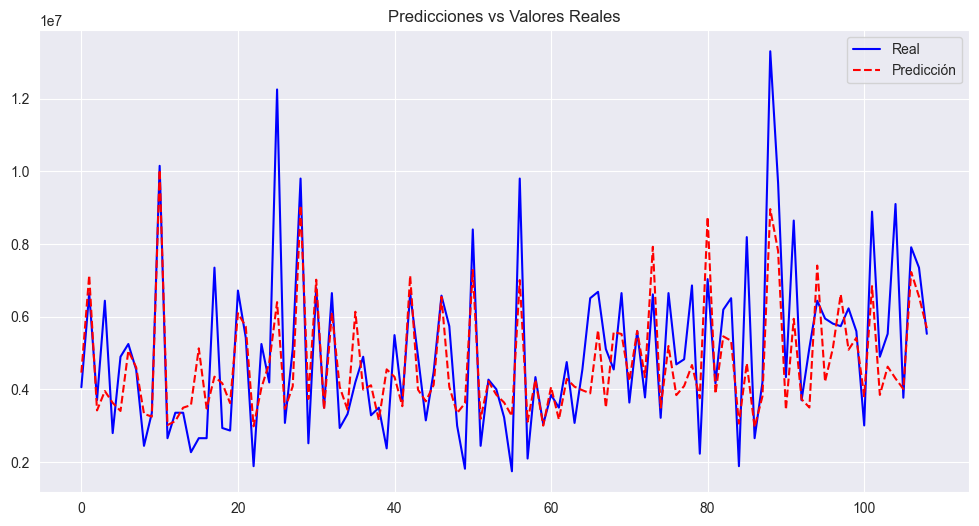

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, 'b-', label='Real')
plt.plot(y_pred, 'r--', label='Predicción')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

RMSE: 1425328.60
MAE: 1022155.42
R²: 0.5981


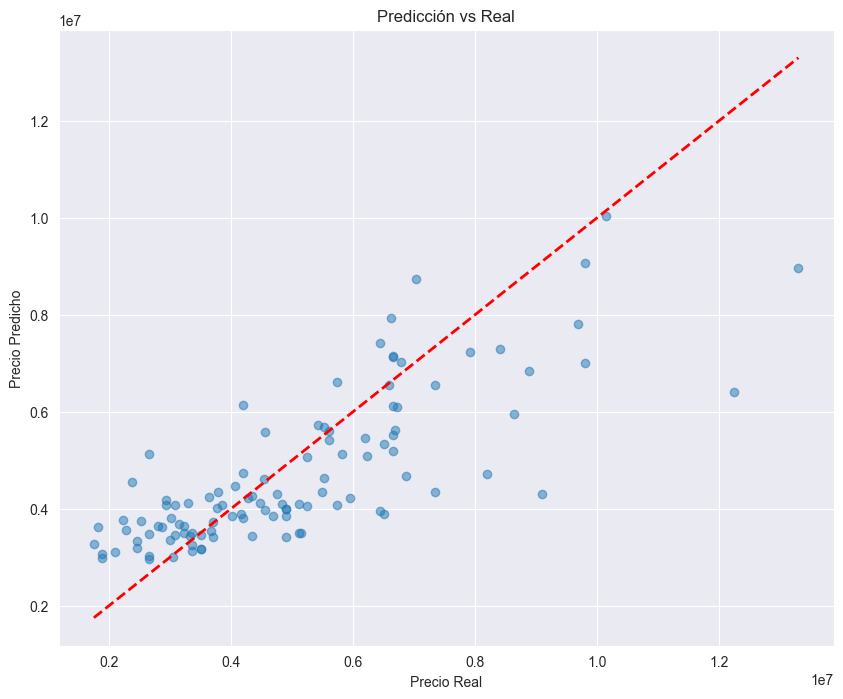

In [29]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test_actual, y_pred, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()], 
         [y_test_actual.min(), y_test_actual.max()], 
         'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicción vs Real')
plt.grid(True)
plt.show()

En verdad cambie el modelo varias veces, no se puede ver en el notebook pero hice bastantes experimentos con diferentes scalers o sin escalar, diferentes modelos y diferentes variables, al final este fue el modelo que mejor se ajusta a los datos. Tambien lo trate de hacer con una ventana de tiempo, pero los resultados fueron pesimos y además no tenía sentido porque los datos no eran secuenciales, cada uno es independiente del otro

## Electricity dataset

In [30]:
file_path = 'Datasets/PRICE_AND_DEMAND_201801_NSW1.csv'
df = pd.read_csv(file_path)

In [31]:
df

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2018/01/01 00:30:00,6912.25,91.86,TRADE
1,NSW1,2018/01/01 01:00:00,6745.63,88.83,TRADE
2,NSW1,2018/01/01 01:30:00,6466.06,73.62,TRADE
3,NSW1,2018/01/01 02:00:00,6279.80,71.49,TRADE
4,NSW1,2018/01/01 02:30:00,6177.31,69.27,TRADE
...,...,...,...,...,...
1483,NSW1,2018/01/31 22:00:00,7352.80,56.73,TRADE
1484,NSW1,2018/01/31 22:30:00,7370.29,60.88,TRADE
1485,NSW1,2018/01/31 23:00:00,7227.34,58.69,TRADE
1486,NSW1,2018/01/31 23:30:00,7055.73,60.24,TRADE


In [32]:
print(df["PERIODTYPE"].unique())
print(df["REGION"].unique())

['TRADE']
['NSW1']


In [33]:
df.dtypes

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

Con esta breve exploración podemos ver que solo nos interesa la fecha y TOTALDEMAND, entonces seran las únicas columnas con las que trabajaremos

In [34]:
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'])

In [36]:
df = df.sort_values(by='SETTLEMENTDATE')

In [37]:
print(df.duplicated().sum())

0


In [39]:
df = df[["SETTLEMENTDATE", "TOTALDEMAND", "RRP"]]

In [41]:
df.shape

(1488, 3)

In [43]:
df.describe()

,SETTLEMENTDATE,TOTALDEMAND,RRP
count,1488,1488.000000,1488.000000
mean,2018-01-16 12:15:00.000000256,8364.867251,76.020121
min,2018-01-01 00:30:00,5910.060000,40.560000
25%,2018-01-08 18:22:30,7220.160000,61.750000
50%,2018-01-16 12:15:00,8205.285000,69.940000
75%,2018-01-24 06:07:30,9383.370000,86.495000
max,2018-02-01 00:00:00,12494.580000,234.860000
std,NaN,1441.819104,19.154113


Con este describe podemos ver que no hay outliers pero igual vamos a graficar la serie para comprobarlo

Ahora nos encargaremos de modificar el index y asegurarnos de que no tenga ningún problema

In [44]:
df.reset_index(inplace=True, drop=True)
df.set_index('SETTLEMENTDATE', inplace=True)

In [45]:
df

,TOTALDEMAND,RRP
SETTLEMENTDATE,,
2018-01-01 00:30:00,6912.25,91.86
2018-01-01 01:00:00,6745.63,88.83
2018-01-01 01:30:00,6466.06,73.62
2018-01-01 02:00:00,6279.80,71.49
2018-01-01 02:30:00,6177.31,69.27
...,...,...
2018-01-31 22:00:00,7352.80,56.73
2018-01-31 22:30:00,7370.29,60.88
2018-01-31 23:00:00,7227.34,58.69


In [47]:
df.index.duplicated().sum()

0

In [48]:
df.index.is_monotonic_increasing

True

In [49]:
print(df.index.freq)

None


In [50]:
df.columns

Index(['TOTALDEMAND', 'RRP'], dtype='object')

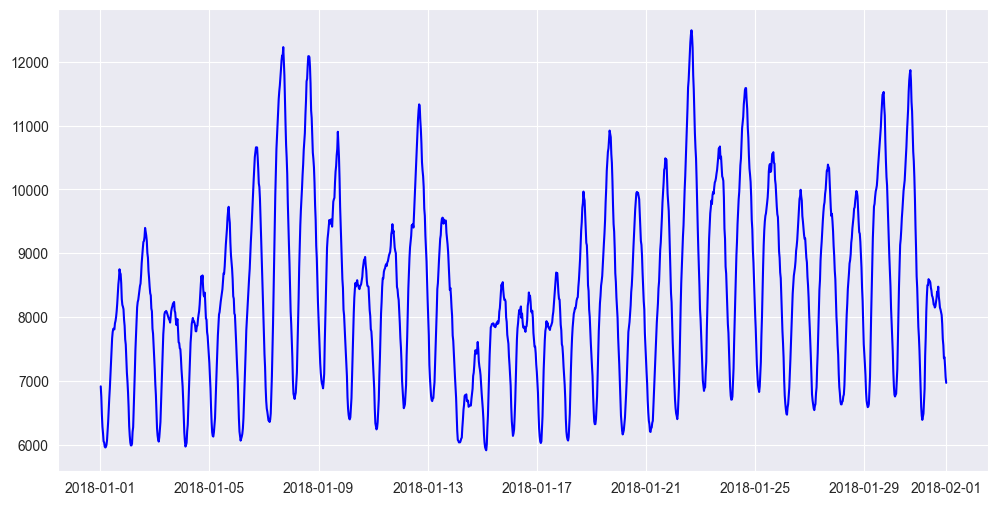

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TOTALDEMAND'], label='Energía', color='blue')
plt.show()

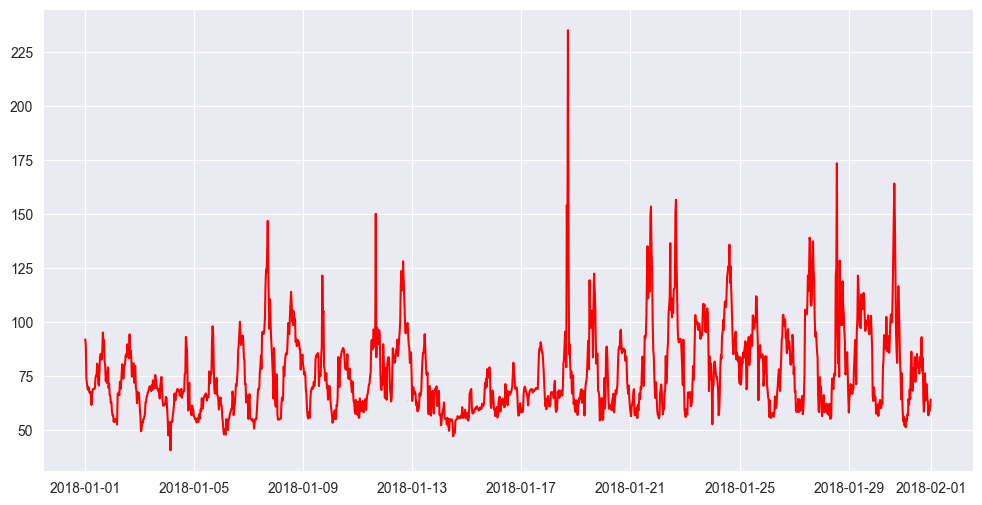

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RRP'], label='Energía', color='red')
plt.show()

Ahora si podemos pasar a la fase de modelado de datos

Obtenemos las variables de predicción

In [59]:
features = ['TOTALDEMAND', 'RRP']
df_features = df[features].copy()

Escalamos los datos

In [60]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_features),
    index=df_features.index,
    columns=df_features.columns
)

Creamos la función para crear dataset secuencial multivariado con múltiples pasos de predicción

In [61]:
def split_multivariate_sequence_m_step(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence) - n_steps_in - n_steps_out + 1):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        if out_end_ix > len(sequence):
            break
    
        seq_x = sequence[i:end_ix, :]
        seq_y = sequence[end_ix:out_end_ix, 0]  
        
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

Convertimos el df a array para el procesamiento

In [62]:
data = df_scaled.values


Definimos un step de 48, ya que la estacionalidad es diaria

In [64]:
n_steps_in = 48  # 24 horas (mediciones cada 30 min)
n_steps_out = 48  # Predecir las siguientes 24 horas

Creamos las secuencias de entrada y salida

In [65]:
X, y = split_multivariate_sequence_m_step(data, n_steps_in, n_steps_out)
print(f"Forma de X: {X.shape}, Forma de y: {y.shape}")

Forma de X: (1393, 48, 2), Forma de y: (1393, 48)


Definimos el conjunto de entrenamiento y de prueba y el número de caracteristicas en una variable

In [66]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
n_features = X.shape[2]

In [67]:
model = Sequential()
model.add(tf.keras.layers.Input(shape=(n_steps_in, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 46, 64)         │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 23, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 21, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │        16,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 48)             │         2,448 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,122 (98.13 KB)

 Trainable params: 25,122 (98.13 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1208 - val_loss: 0.0433
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0354 - val_loss: 0.0244
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0234 - val_loss: 0.0157
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 - val_loss: 0.0115
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 - val_loss: 0.0121
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0140 - val_loss: 0.0102
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - val_loss: 0.0125
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - val_loss: 0.0104
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 - val_loss: 0.0132
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113 - val_loss: 0.0175
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112 - val_loss: 0.0103
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

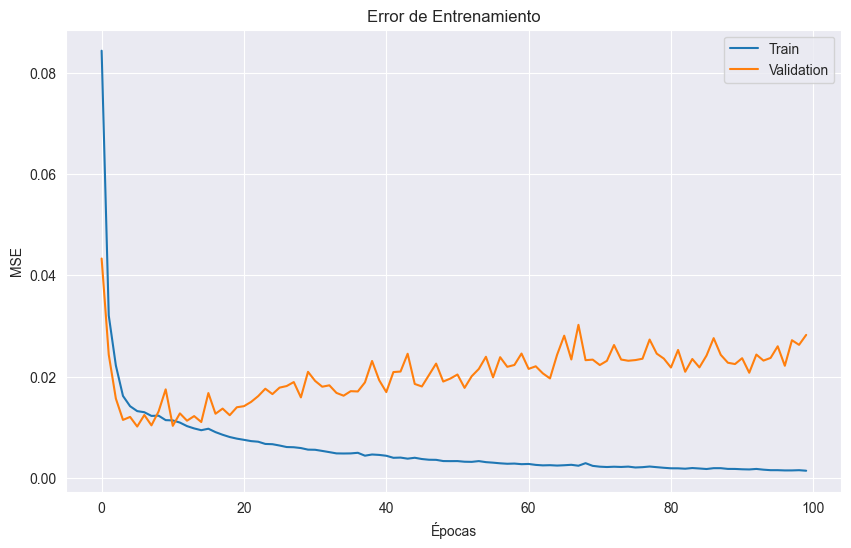

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Error de Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

Evaluamos el modelo

In [70]:
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [71]:
y_test_denorm = np.zeros((y_test.shape[0], y_test.shape[1]))
y_pred_denorm = np.zeros((y_pred.shape[0], y_pred.shape[1]))

Invertimos la normalización solo para total demand

In [72]:
for i in range(len(y_test)):
    # Creamos arrays temporales con ceros para RRP 
    temp_test = np.zeros((y_test.shape[1], 2))
    temp_pred = np.zeros((y_pred.shape[1], 2))
    
    # Asignamos los valores de TOTALDEMAND
    temp_test[:, 0] = y_test[i]
    temp_pred[:, 0] = y_pred[i]
    
    # Invertimos la normalización
    temp_test_denorm = scaler.inverse_transform(temp_test)
    temp_pred_denorm = scaler.inverse_transform(temp_pred)
    
    # Guardamos los valores denormalizados de TOTALDEMAND
    y_test_denorm[i] = temp_test_denorm[:, 0]
    y_pred_denorm[i] = temp_pred_denorm[:, 0]

In [73]:
rmse = np.sqrt(mean_squared_error(y_test_denorm.flatten(), y_pred_denorm.flatten()))
mae = mean_absolute_error(y_test_denorm.flatten(), y_pred_denorm.flatten())
r2 = r2_score(y_test_denorm.flatten(), y_pred_denorm.flatten())

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

RMSE: 994.22
MAE: 714.11
R²: 0.4985


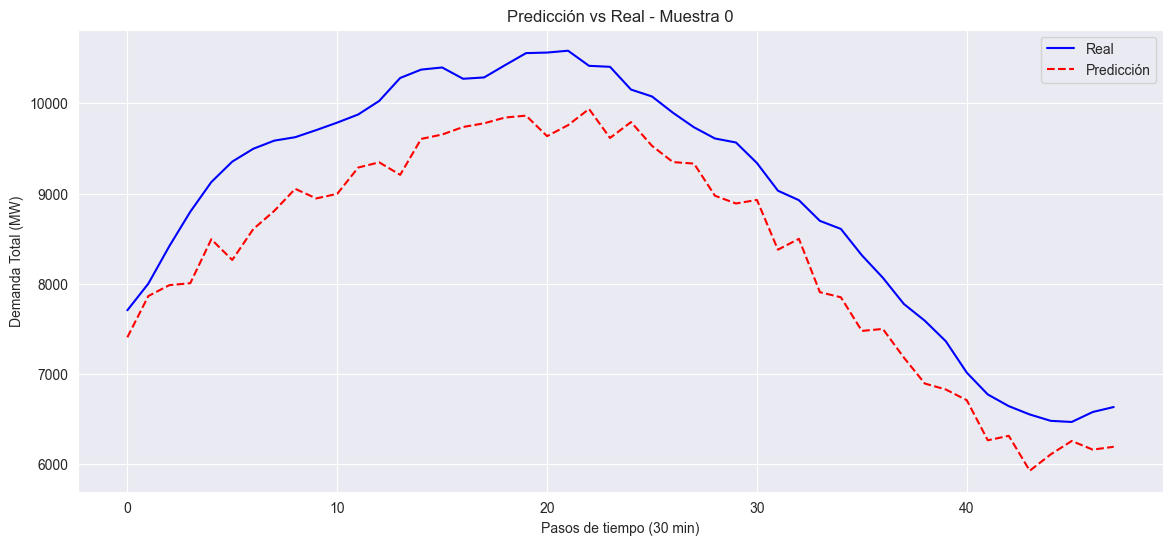

In [76]:
# Visualizar algunos ejemplos de predicciones
sample_idx = 0  # Índice de muestra a visualizar

plt.figure(figsize=(14, 6))
plt.plot(y_test_denorm[sample_idx], 'b-', label='Real')
plt.plot(y_pred_denorm[sample_idx], 'r--', label='Predicción')
plt.title(f'Predicción vs Real - Muestra {sample_idx}')
plt.xlabel('Pasos de tiempo (30 min)')
plt.ylabel('Demanda Total (MW)')
plt.legend()
plt.grid(True)
plt.show()

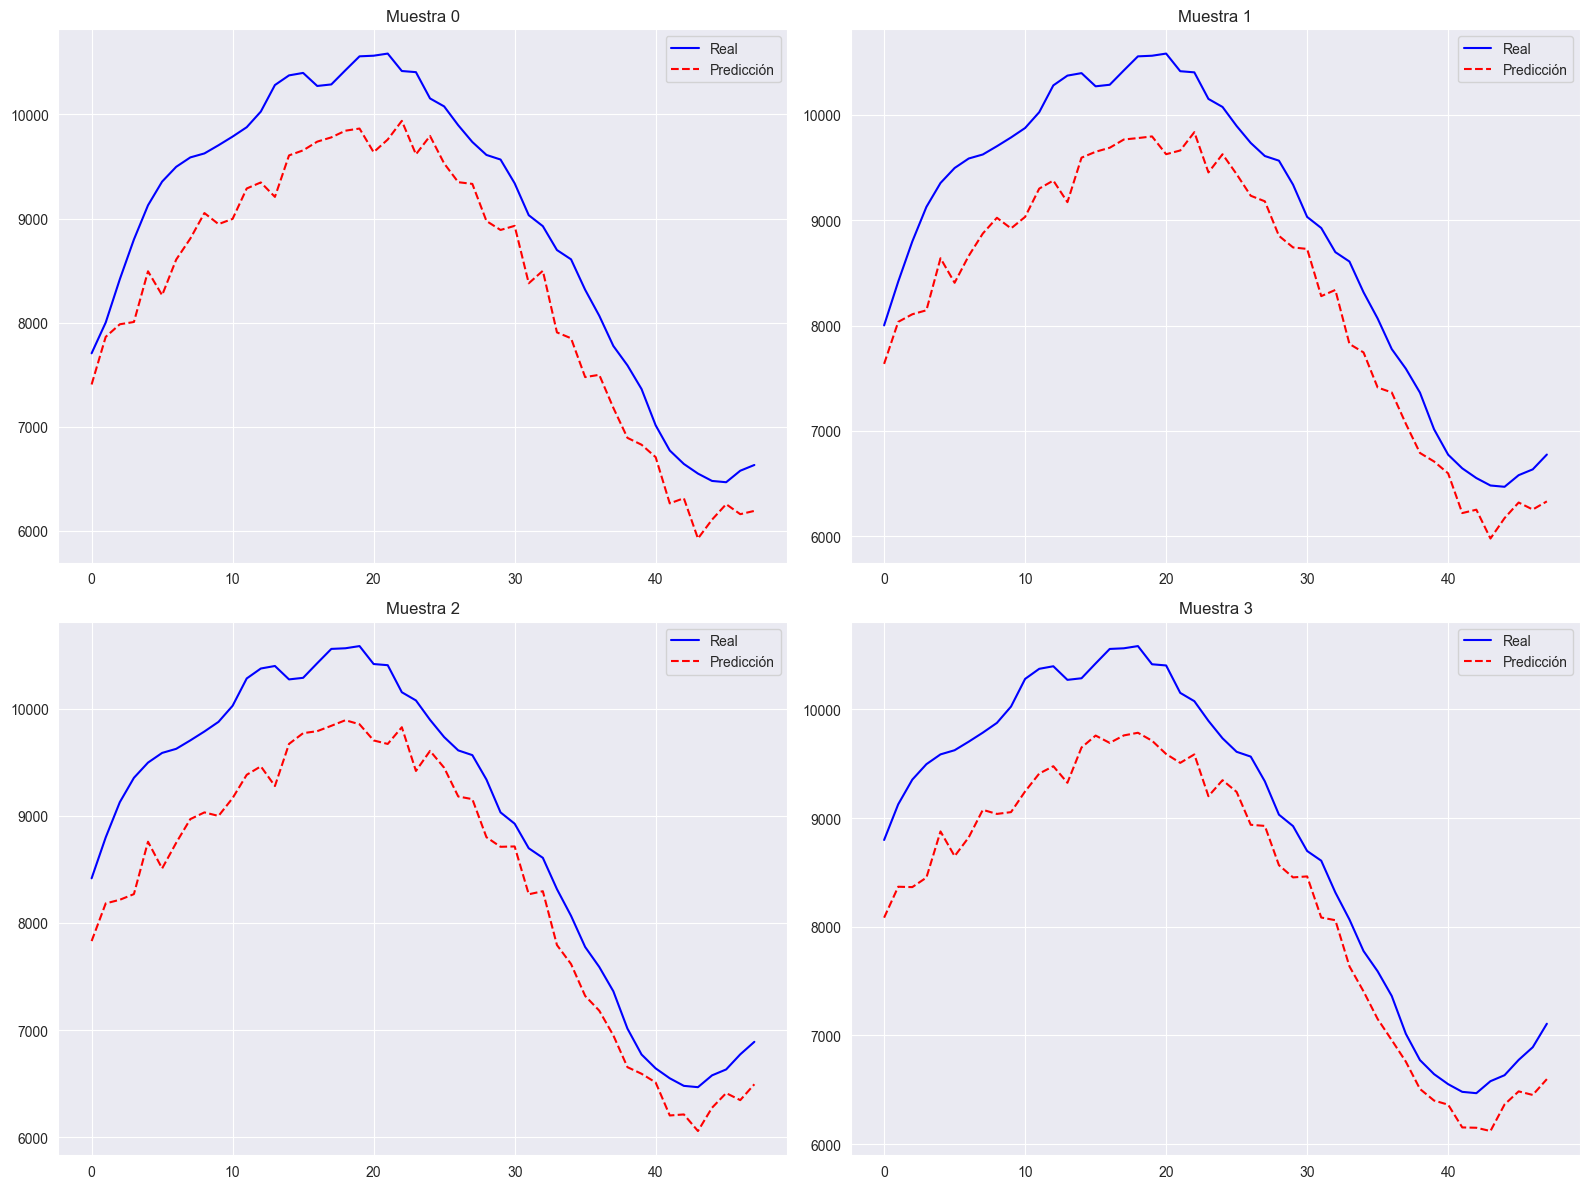

In [77]:
plt.figure(figsize=(16, 12))
for i in range(4):
    if i < len(y_test_denorm):
        plt.subplot(2, 2, i+1)
        plt.plot(y_test_denorm[i], 'b-', label='Real')
        plt.plot(y_pred_denorm[i], 'r--', label='Predicción')
        plt.title(f'Muestra {i}')
        plt.legend()
        plt.grid(True)
plt.tight_layout()
plt.show()

## Discusión del paper

## Discusión
En el artículo sobre segmentación de objetos usando redes neuronales convolucionales (CNN), se habla sobre cómo las CNN pueden ayudar a identificar y separar objetos dentro de una imagen. Esto es muy útil en aplicaciones como la visión por computadora, donde las máquinas necesitan reconocer diferentes objetos, como autos en una calle o personas en una foto.

Primero, el artículo explica cómo funciona una CNN. Estas redes se inspiran en la forma en que el cerebro humano procesa las imágenes. Las CNN utilizan diferentes capas para analizar la imagen, detectando patrones como líneas, formas y texturas. Estas capas ayudan a la red a "entender" lo que está viendo y a distinguir un objeto de otro.

Luego, se menciona el proceso de entrenamiento. Para que una CNN aprenda a segmentar objetos correctamente, necesita muchas imágenes etiquetadas. Por ejemplo, si se quiere que la red aprenda a reconocer autos, se le deben mostrar muchas fotos donde los autos están claramente identificados. Así, la red aprende a detectar las características importantes de los autos y a separarlos del fondo de la imagen.

## Resultados
En cuanto a los resultados, el artículo destaca que las CNN han demostrado ser muy efectivas en la segmentación de objetos. Logran identificar los bordes y detalles de los objetos con mucha precisión, lo que las hace ideales para tareas como el reconocimiento facial, la conducción autónoma y la vigilancia por cámaras. Sin embargo, también se menciona que el entrenamiento de estas redes requiere mucho tiempo y recursos computacionales.

En conclusión, el artículo muestra que las CNN son una herramienta poderosa para la segmentación de objetos en imágenes. Aunque requieren de un proceso de entrenamiento exigente, los resultados que ofrecen son muy precisos y útiles en diferentes aplicaciones tecnológicas.

**Cita**: Cai, Z., & Vasconcelos, N. (2018). Cascade r-cnn: Delving into high quality object detection. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 6154-6162).


Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2
.
.
.
.


### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........